# 11 | House price prediction using Linear Regression-SingleVariable**

### *Import Libraries*

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

### *Load Dataset*

In [25]:
dataset = pd.read_csv('dataset.csv')
dataset

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


### *Load Summarize*

In [20]:
print(dataset.shape)
print(dataset.head(5))

(1460, 2)
    area   price
0   8450  208500
1   9600  181500
2  11250  223500
3   9550  140000
4  14260  250000


### *Visualize Dataset*

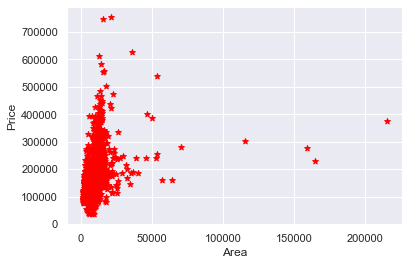

In [21]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(dataset.area,dataset.price,color='red',marker='*')

In [5]:
X = dataset.drop('price',axis='columns')
X

,area
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [6]:
Y = dataset.price
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

### *Training Dataset using Linear Regression*

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
print(model.intercept_)

151498.4814373203


### *Predicted Price for Land sq.Feet of custom values*

In [34]:
x=40000
LandAreainSqFt=[[x]]
PredictedmodelResult = model.predict(LandAreainSqFt)
print(PredictedmodelResult)

[265519.05402414]


In [37]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
area,2.850514


### Let's check is our model is Right ?
### Theory Calculation
### Y = m * X + b (m is coefficient and b is intercept)

*Coefficient - m*

In [9]:
m=model.coef_
print(m)

[2.09997195]


*Intercept - b*

In [10]:
b=model.intercept_
print(b)

158836.15189687657


### Y=mx+b
*x is Independant variable - Input - area*

In [11]:
y = m*x + b
print("The Price of {0} Square feet Land is: {1}".format(x,y[0]))

The Price of 40000 Square feet Land is: 242835.0299651836


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

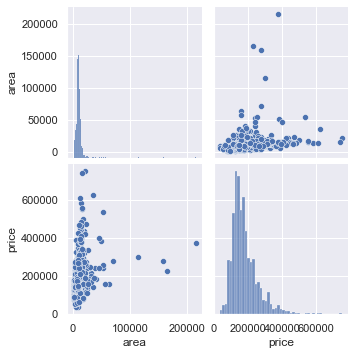

In [23]:
sns.pairplot(dataset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

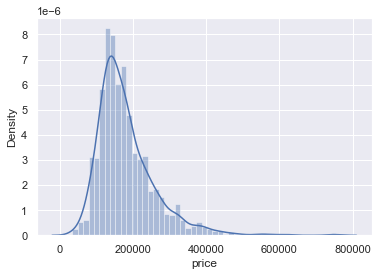

In [26]:
sns.distplot(dataset['price'])

In [38]:
predictions = model.predict(X_test)

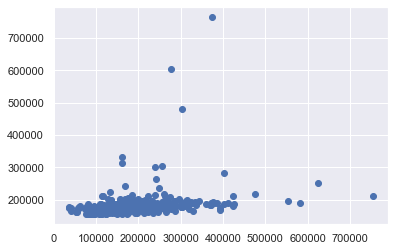

In [39]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

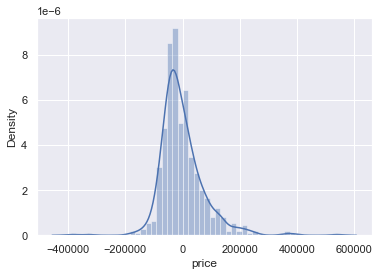

In [40]:
sns.distplot((y_test-predictions),bins=50)

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 54424.77252110461
MSE: 6062917906.323225
RMSE: 77864.74109841518


In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
1054,255000,183900.277652
361,145000,177563.584331
1282,150500,176583.007406
161,412500,190516.321377
515,402861,186331.766363
...,...,...
948,192500,191422.784929
1089,197000,160950.786905
1240,224900,174752.977216
570,142600,188843.069474


<AxesSubplot:xlabel='area', ylabel='price'>

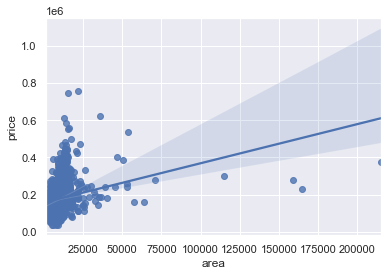

In [46]:
sns.regplot(x="area", y="price", data=dataset)